In [16]:
import pandas as pd

df = pd.read_csv('CEA_FAWN_1_AllStations_T_RH_RF_SR_Doy.csv') 
df.dtypes

StationID          int64
Date              object
Temperature      float64
RelatHumidity    float64
Rainfall         float64
SolarRad         float64
doy                int64
dtype: object

In [17]:
df.shape

(314602, 7)

In [18]:
# Filtering data by season and years

# Years: 2003 - 2023

# Season:
#   StAS = November to February
#   BAS = December to May
# Total Season: StAS + BAS {nov, dec, jan, feb, mar, apr, may} - 212 days


# delete data before 2003
df = df[~(df['Date'] < '2003-01-01')]


# delete between june and october, every year
for i in range(2003,2024):
    from_ts = str(i)+'-06-01'
    to_ts = str(i)+'-10-31'
    df = df[(df['Date'] < from_ts) | (df['Date'] > to_ts)]


#delete the start of 1997
from_ts = '2003-01-01'
to_ts = '2003-10-31'
df = df[(df['Date'] < from_ts) | (df['Date'] > to_ts)]

#delete the end of 2023
from_ts = '2023-06-01'
to_ts = '2023-12-31'
df = df[(df['Date'] < from_ts) | (df['Date'] > to_ts)]


df.shape

(163454, 7)

In [19]:
df.head()

,StationID,Date,Temperature,RelatHumidity,Rainfall,SolarRad,doy
27685,110,2003-11-01,19.806,80.327,0.000,14.882,305
27686,110,2003-11-02,19.501,69.103,0.000,16.198,306
27687,110,2003-11-03,20.893,66.638,0.000,15.755,307
27688,110,2003-11-04,22.931,86.098,0.036,7.090,308
27689,110,2003-11-05,23.967,85.928,0.000,10.619,309


In [20]:
# Filtering data by stations
# Check existence of data for all stations

ids = df['StationID'].unique()
print(ids)
print(len(ids))

[110 130 140 150 160 170 180 230 240 250 260 270 280 290 302 303 304 310
 320 330 340 350 360 380 410 420 430 440 450 460 470 390 490 405 480 371
 311 120 121 241 275 425 435 455 111 261 134 115 315 400 190 125 335 395]
54


In [21]:
# Delete data from unkown stations

stations = pd.read_csv('FAWNStationsListDeg.csv')
names = stations[['StationName','StationID']]

realStations=[]
unknownStations=[]

for ID in ids:
    if ID in names['StationID'].values:
        realStations.append(ID)
    else:
        unknownStations.append(ID)
        
print(str(len(realStations))+" - Real Stations: "+str(realStations))
print(str(len(unknownStations))+" - Unknown Stations: "+str(unknownStations))

41 - Real Stations: [110, 130, 140, 150, 160, 170, 180, 230, 240, 250, 260, 270, 280, 290, 302, 303, 304, 320, 330, 340, 350, 360, 380, 410, 420, 430, 440, 450, 460, 470, 490, 405, 480, 311, 120, 121, 241, 275, 425, 435, 455]
13 - Unknown Stations: [310, 390, 371, 111, 261, 134, 115, 315, 400, 190, 125, 335, 395]


In [22]:
df.shape

(163454, 7)

In [23]:
# clean data from unkownd stations
for station in unknownStations:
    df.drop(df[(df['StationID'] == station)].index, inplace=True)

df.shape

(152901, 7)

In [24]:
df.dtypes

StationID          int64
Date              object
Temperature      float64
RelatHumidity    float64
Rainfall         float64
SolarRad         float64
doy                int64
dtype: object

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.dtypes

StationID                 int64
Date             datetime64[ns]
Temperature             float64
RelatHumidity           float64
Rainfall                float64
SolarRad                float64
doy                       int64
dtype: object

In [27]:
# check if stations have data for all years

df_byStationYearMonth = df.groupby([df['StationID'], df['Date'].dt.year.rename('year'),df['Date'].dt.month.rename('month')]).agg({'count'})
df_byStationYearMonth = df_byStationYearMonth.reset_index()
print(df_byStationYearMonth.head())

  StationID  year month  Date Temperature RelatHumidity Rainfall SolarRad  \
                        count       count         count    count    count   
0       110  2003    11    30          30            30       30       29   
1       110  2003    12    31          31            31       31       21   
2       110  2004     1    31          31            31       31       24   
3       110  2004     2    28          28            28       28       28   
4       110  2004     3    31          31            31       31       30   

    doy  
  count  
0    30  
1    31  
2    31  
3    28  
4    31  


In [28]:
df_byStationYear = df_byStationYearMonth[['StationID','year','month']]
print(df_byStationYear.head())

  StationID  year month
                       
0       110  2003    11
1       110  2003    12
2       110  2004     1
3       110  2004     2
4       110  2004     3


In [29]:
import numpy as np
import collections

stationYears = {}

for station in realStations:
    
    df_station = df_byStationYear.loc[df_byStationYear['StationID'] == station]
    df_aux = df_station['year'].unique()
    stationYears[station] = np.sort(df_aux)
    
ordStationYears = collections.OrderedDict(sorted(stationYears.items()))


In [30]:
for key in ordStationYears:
    print("\nStation: "+str(key))
    print(ordStationYears[key])



Station: 110
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]

Station: 120
[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]

Station: 121
[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]

Station: 130
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]

Station: 140
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]

Station: 150
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]

Station: 160
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]

Station: 170
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]

Station: 180
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]

Sta

In [16]:

# filter data from stations with few data (less equal than 20 years)
for station in ordStationYears:
    nYears = len(ordStationYears[station])
    if nYears <= 20:
        df.drop(df[(df['StationID'] == station)].index, inplace=True)


In [17]:
ids_filtered = df['StationID'].unique()
print(ids_filtered)
print(len(ids_filtered))

[110 130 140 150 160 170 180 230 240 250 260 270 280 290 302 303 304 320
 330 340 350 360 380 410 420 440 450 460 470]
29


In [18]:
df.head()

,StationID,Date,Temperature,RelatHumidity,Rainfall,SolarRad,doy
27685,110,2003-11-01,19.806,80.327,0.000,14.882,305
27686,110,2003-11-02,19.501,69.103,0.000,16.198,306
27687,110,2003-11-03,20.893,66.638,0.000,15.755,307
27688,110,2003-11-04,22.931,86.098,0.036,7.090,308
27689,110,2003-11-05,23.967,85.928,0.000,10.619,309


In [19]:
df.shape

(122593, 7)

In [20]:
df.to_csv('CEA_FAWN_2_Filtered_T_RH_RF_SR_Doy.csv', index=False)

In [21]:
# QUALITY CHECKING

import pandas as pd

df = pd.read_csv('CEA_FAWN_2_Filtered_T_RH_RF_SR_Doy.csv') 
df.dtypes

StationID          int64
Date              object
Temperature      float64
RelatHumidity    float64
Rainfall         float64
SolarRad         float64
doy                int64
dtype: object

In [22]:
df.head()

,StationID,Date,Temperature,RelatHumidity,Rainfall,SolarRad,doy
0,110,2003-11-01,19.806,80.327,0.000,14.882,305
1,110,2003-11-02,19.501,69.103,0.000,16.198,306
2,110,2003-11-03,20.893,66.638,0.000,15.755,307
3,110,2003-11-04,22.931,86.098,0.036,7.090,308
4,110,2003-11-05,23.967,85.928,0.000,10.619,309


In [23]:
# QC - Missing Values

# Maximum of measurements
# t = measurements per day
# d = days per season
# y = number of years/seasons
# s = number of stations
#       MaxMeas = t * d * y * s
maxMeasurements = 1*212*20*29

realMeasurements = len(df.index)

missingValues = maxMeasurements - realMeasurements


print("Maximum number of measurements: "+str(maxMeasurements))
print("Real number of measurements: "+str(realMeasurements))
print("Missing measurements: "+str(missingValues))

Maximum number of measurements: 122960
Real number of measurements: 122593
Missing measurements: 367


In [24]:
print("Missing Values")
print(missingValues/maxMeasurements)
print(realMeasurements/maxMeasurements)

Missing Values
0.0029847104749512036
0.9970152895250488


In [25]:
# QC - Null Values

null_count = df.isnull().sum().sum()
print("Null values: "+str(null_count))
print("%: "+str(null_count/maxMeasurements))


Null values: 1342
%: 0.010914118412491867


In [29]:
# QC - Outliers detection

import pandas as pd

df = pd.read_csv('CEA_FAWN_2_Filtered_T_RH_RF_SR_Doy.csv') 

In [30]:
# Temperature

factor = 1.5

q1_T = df["Temperature"].quantile(0.25)
q3_T = df["Temperature"].quantile(0.75)
        
iqr_T = q3_T - q1_T
        
upper_limit_T = q3_T + (factor*iqr_T)
lower_limit_T = q1_T - (factor*iqr_T)

T_outliers = np.where(df["Temperature"] > upper_limit_T, True,
             np.where(df["Temperature"] < lower_limit_T, True, False))

T_without_outliers = df.loc[~(T_outliers)]

print("Upper_limit_T: "+str(upper_limit_T))
print("Lower_limit_T: "+str(lower_limit_T))

print("Temperature Outliers: "+str(df.shape[0]-T_without_outliers.shape[0]))

# capping outliers with upper and lower limits
df["Temperature"] = np.where(df["Temperature"]>upper_limit_T, upper_limit_T,
                 np.where(df["Temperature"]<lower_limit_T, lower_limit_T, df["Temperature"]))

Upper_limit_T: 33.804500000000004
Lower_limit_T: 3.5525
Temperature Outliers: 1190


In [31]:
# Relative Humidity

factor = 1.5

q1_RH = df["RelatHumidity"].quantile(0.25)
q3_RH = df["RelatHumidity"].quantile(0.75)
        
iqr_RH = q3_RH - q1_RH
        
upper_limit_RH = q3_RH + (factor*iqr_RH)
lower_limit_RH = q1_RH - (factor*iqr_RH)

RH_outliers = np.where(df["RelatHumidity"] > upper_limit_RH, True,
             np.where(df["RelatHumidity"] < lower_limit_RH, True, False))

RH_without_outliers = df.loc[~(RH_outliers)]

print("Upper_limit_RH: "+str(upper_limit_RH))
print("Lower_limit_RH: "+str(lower_limit_RH))

print("Relative Humidity Outliers: "+str(df.shape[0]-RH_without_outliers.shape[0]))

# capping outliers with upper and lower limits
df["RelatHumidity"] = np.where(df["RelatHumidity"]>upper_limit_RH, upper_limit_RH,
                 np.where(df["RelatHumidity"]<lower_limit_RH, lower_limit_RH, df["RelatHumidity"]))

Upper_limit_RH: 105.67549999999997
Lower_limit_RH: 48.81550000000002
Relative Humidity Outliers: 1288


In [32]:
# Rainfall

factor = 1.5

q1_RF = df["Rainfall"].quantile(0.25)
q3_RF = df["Rainfall"].quantile(0.75)
        
iqr_RF = q3_RF - q1_RF
        
upper_limit_RF = q3_RF + (factor*iqr_RF)
lower_limit_RF = q1_RF - (factor*iqr_RF)

RF_outliers = np.where(df["Rainfall"] > upper_limit_RF, True,
             np.where(df["Rainfall"] < lower_limit_RF, True, False))

RF_without_outliers = df.loc[~(RF_outliers)]

print("Upper_limit_RF: "+str(upper_limit_RF))
print("Lower_limit_RF: "+str(lower_limit_RF))

print("Rainfall Outliers: "+str(df.shape[0]-RF_without_outliers.shape[0]))

# capping outliers with upper and lower limits
df["Rainfall"] = np.where(df["Rainfall"]>upper_limit_RF, upper_limit_RF,
                 np.where(df["Rainfall"]<lower_limit_RF, lower_limit_RF, df["Rainfall"]))

Upper_limit_RF: 0.0225
Lower_limit_RF: -0.013499999999999998
Rainfall Outliers: 23150


In [33]:
# Solar Radiation

factor = 1.5

q1_SR = df["SolarRad"].quantile(0.25)
q3_SR = df["SolarRad"].quantile(0.75)
        
iqr_SR = q3_SR - q1_SR
        
upper_limit_SR = q3_SR + (factor*iqr_SR)
lower_limit_SR = q1_SR - (factor*iqr_SR)

SR_outliers = np.where(df["SolarRad"] > upper_limit_SR, True,
             np.where(df["SolarRad"] < lower_limit_SR, True, False))

SR_without_outliers = df.loc[~(SR_outliers)]

print("Upper_limit_SR: "+str(upper_limit_SR))
print("Lower_limit_SR: "+str(lower_limit_SR))

print("Solar Radiation Outliers: "+str(df.shape[0]-SR_without_outliers.shape[0]))

# capping outliers with upper and lower limits
df["SolarRad"] = np.where(df["SolarRad"]>upper_limit_SR, upper_limit_SR,
                 np.where(df["SolarRad"]<lower_limit_SR, lower_limit_SR, df["SolarRad"]))

Upper_limit_SR: 34.268899
Lower_limit_SR: -3.9385649999999988
Solar Radiation Outliers: 32


In [34]:
df.head()

,StationID,Date,Temperature,RelatHumidity,Rainfall,SolarRad,doy
0,110,2003-11-01,19.806,80.327,0.0000,14.882,305
1,110,2003-11-02,19.501,69.103,0.0000,16.198,306
2,110,2003-11-03,20.893,66.638,0.0000,15.755,307
3,110,2003-11-04,22.931,86.098,0.0225,7.090,308
4,110,2003-11-05,23.967,85.928,0.0000,10.619,309


In [35]:
df.to_csv('CEA_FAWN_3_Preprocessed_T_RH_RF_SR_Doy.csv', index=False)

In [31]:
# Stations Data
import pandas as pd

df = pd.read_csv('CEA_FAWN_3_Preprocessed_T_RH_RF_SR_Doy.csv') 
df.shape

(122593, 7)

In [10]:
# Stations Data
import pandas as pd

df = pd.read_csv('CEA_FAWN_3_Preprocessed_T_RH_RF_SR_Doy.csv') 

unique_station_ids = df['StationID'].unique()
unique_station_ids

array([110, 130, 140, 150, 160, 170, 180, 230, 240, 250, 260, 270, 280,
       290, 302, 303, 304, 320, 330, 340, 350, 360, 380, 410, 420, 440,
       450, 460, 470])

In [7]:
stations = pd.read_csv('FAWNStationsListDeg.csv')
stations = stations[stations['StationID'].isin(unique_station_ids)]
stations.shape

(29, 11)

In [8]:
names = stations[['StationID', 'StationName', 'County','latitude','longitude']]
names_sort = names.sort_values(by=['StationID'])

#names_sort

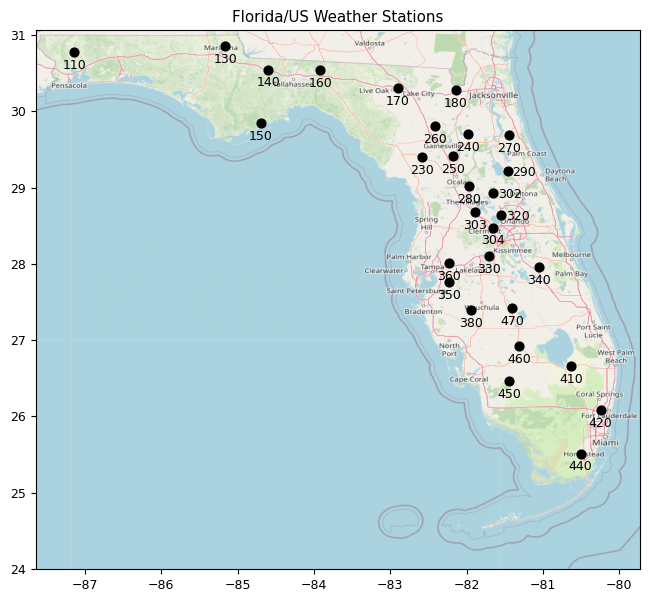

In [9]:
from FWTSClust_functions import *

y=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_IDs(stations_map,y)